In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# splitting
from sklearn.model_selection import train_test_split

# models
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sns.set_style('white')

In [4]:
#shuffling data
from sklearn.utils import shuffle

In [5]:

original_df = shuffle(df_2, random_state=0)

# separating features and targets dataframes

# For the independent features:

X = original_df.iloc[:,0:-2].copy()

# For the targets:

y_AR = original_df.iloc[:,-2].copy()
#y_YI = original_df.iloc[:,-1].copy()

## Modelling for Aspect Ratio

### Random Forest 

In [21]:
# now trying with bayesian optimization

from skopt import BayesSearchCV

In [22]:
from skopt.space import Real, Categorical, Integer

In [11]:
# Creating dataframe
df_3 = pd.read_excel(r'C:\Users\Solange Iamin\Documents\Mestrado_UFPR\Pesquisa_PRH\Modelos\Props_nanoceluloses_2\tabela_dados_2_copia_artigo.xlsx')

# we know that the columns "Sample" should be the index of the table
df_3.index = df_3["Sample"]
df_3.drop("Sample", axis =1, inplace = True)
df_3

,Enzyme dosage (g/ton),Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Insoluble lignin (wt.%),Soluble lignin (wt.%),Extractives (wt.%),Ashes (wt.%),CrI (%),Aspect ratio,Yield of nanofibrillation (%)
Sample,,,,,,,,,,,,,,,
Eucamec(3),0,184,0.095,5.67,0.2646,0.308,0.742,0.174,0.008,0.058,0.013,0.005,NaN,155,0.102366
Eucamec(3+1),0,195,0.107,7.73,0.3936,0.296,0.742,0.174,0.008,0.058,0.013,0.005,NaN,168,0.115687
Eucamec(3+3),0,208,0.132,11.67,1.3856,0.267,0.742,0.174,0.008,0.058,0.013,0.005,NaN,179,0.165490
Eucamec(3+3+1),0,213,0.166,14.59,1.6720,0.273,0.742,0.174,0.008,0.058,0.013,0.005,NaN,200,0.189679
Eucamec(3+3+3),0,215,0.194,19.72,2.0968,0.245,0.742,0.174,0.008,0.058,0.013,0.005,NaN,220,0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RecHenz240(3),240,176,0.075,5.67,1.0154,0.318,0.551,0.153,0.156,0.049,0.010,0.081,NaN,71,0.092897
RecHenz240(3+1),240,189,0.118,7.73,1.5009,0.253,0.551,0.153,0.156,0.049,0.010,0.081,NaN,72,0.138071
RecHenz240(3+3),240,205,0.184,11.67,1.6471,0.229,0.551,0.153,0.156,0.049,0.010,0.081,NaN,75,0.203436


In [12]:
df_3.columns

Index(['Enzyme dosage (g/ton)', 'Cationic demand (µeq/g)',
       'Transmittance at 600 nm (%)', 'HPH - Energy consumption (kWh/kg)',
       'Consistency index "k"', 'Flow index "n"', 'Cellulose (wt.%)',
       'Hemicellulose (wt.%)', 'Insoluble lignin (wt.%)',
       'Soluble lignin (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)',
       'CrI (%)', 'Aspect ratio', 'Yield of nanofibrillation (%)'],
      dtype='object')

In [12]:
# Summing soluble and insoluble ligning (so to get total ligning in raw material)
df_3['Total lignin (wt.%)'] = df_3['Insoluble lignin (wt.%)'] + df_3['Soluble lignin (wt.%)']
df_4 = df_3[['Enzyme dosage (g/ton)','Cationic demand (µeq/g)','Transmittance at 600 nm (%)','HPH - Energy consumption (kWh/kg)','Consistency index "k"','Flow index "n"','Cellulose (wt.%)','Hemicellulose (wt.%)','Total lignin (wt.%)','Extractives (wt.%)','Ashes (wt.%)','Aspect ratio',
       'Yield of nanofibrillation (%)']]
display(df_4)

,Enzyme dosage (g/ton),Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%),Aspect ratio,Yield of nanofibrillation (%)
Sample,,,,,,,,,,,,,
Eucamec(3),0,184,0.095,5.67,0.2646,0.308,0.742,0.174,0.066,0.013,0.005,155,0.102366
Eucamec(3+1),0,195,0.107,7.73,0.3936,0.296,0.742,0.174,0.066,0.013,0.005,168,0.115687
Eucamec(3+3),0,208,0.132,11.67,1.3856,0.267,0.742,0.174,0.066,0.013,0.005,179,0.165490
Eucamec(3+3+1),0,213,0.166,14.59,1.6720,0.273,0.742,0.174,0.066,0.013,0.005,200,0.189679
Eucamec(3+3+3),0,215,0.194,19.72,2.0968,0.245,0.742,0.174,0.066,0.013,0.005,220,0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RecHenz240(3),240,176,0.075,5.67,1.0154,0.318,0.551,0.153,0.205,0.010,0.081,71,0.092897
RecHenz240(3+1),240,189,0.118,7.73,1.5009,0.253,0.551,0.153,0.205,0.010,0.081,72,0.138071
RecHenz240(3+3),240,205,0.184,11.67,1.6471,0.229,0.551,0.153,0.205,0.010,0.081,75,0.203436


<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Eucamec(3) to RecHenz240(3+3+3)
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Enzyme dosage (g/ton)              140 non-null    int64  
 1   Cationic demand (µeq/g)            140 non-null    int64  
 2   Transmittance at 600 nm (%)        140 non-null    float64
 3   HPH - Energy consumption (kWh/kg)  140 non-null    float64
 4   Consistency index "k"              140 non-null    float64
 5   Flow index "n"                     140 non-null    float64
 6   Cellulose (wt.%)                   140 non-null    float64
 7   Hemicellulose (wt.%)               140 non-null    float64
 8   Total lignin (wt.%)                140 non-null    float64
 9   Extractives (wt.%)                 140 non-null    float64
 10  Ashes (wt.%)                       140 non-null    float64
 11  Aspect ratio                       140 n

""


,count,mean,std,min,25%,50%,75%,max
Enzyme dosage (g/ton),140.0,102.857143,100.318096,0.0000,0.000000,80.000000,240.000000,240.000000
Cationic demand (µeq/g),140.0,195.757143,28.865571,2.0000,181.000000,202.500000,214.000000,250.000000
Transmittance at 600 nm (%),140.0,0.132108,0.064546,0.0250,0.080500,0.123500,0.173250,0.337000
HPH - Energy consumption (kWh/kg),140.0,11.876000,5.010729,5.6700,7.730000,11.670000,14.590000,19.720000
"Consistency index ""k""",140.0,1.634484,1.499906,0.1308,0.622625,1.194300,1.987625,7.678700
"Flow index ""n""",140.0,0.311679,0.114654,0.0620,0.237000,0.303500,0.383250,0.670000
Cellulose (wt.%),140.0,0.709357,0.164305,0.4460,0.534250,0.768000,0.864250,0.887000
Hemicellulose (wt.%),140.0,0.142071,0.050690,0.0550,0.092250,0.146000,0.176000,0.229000
Total lignin (wt.%),140.0,0.143429,0.111709,0.0390,0.059250,0.076000,0.272500,0.345000
Extractives (wt.%),140.0,0.008714,0.004332,0.0000,0.005750,0.009000,0.012000,0.018000


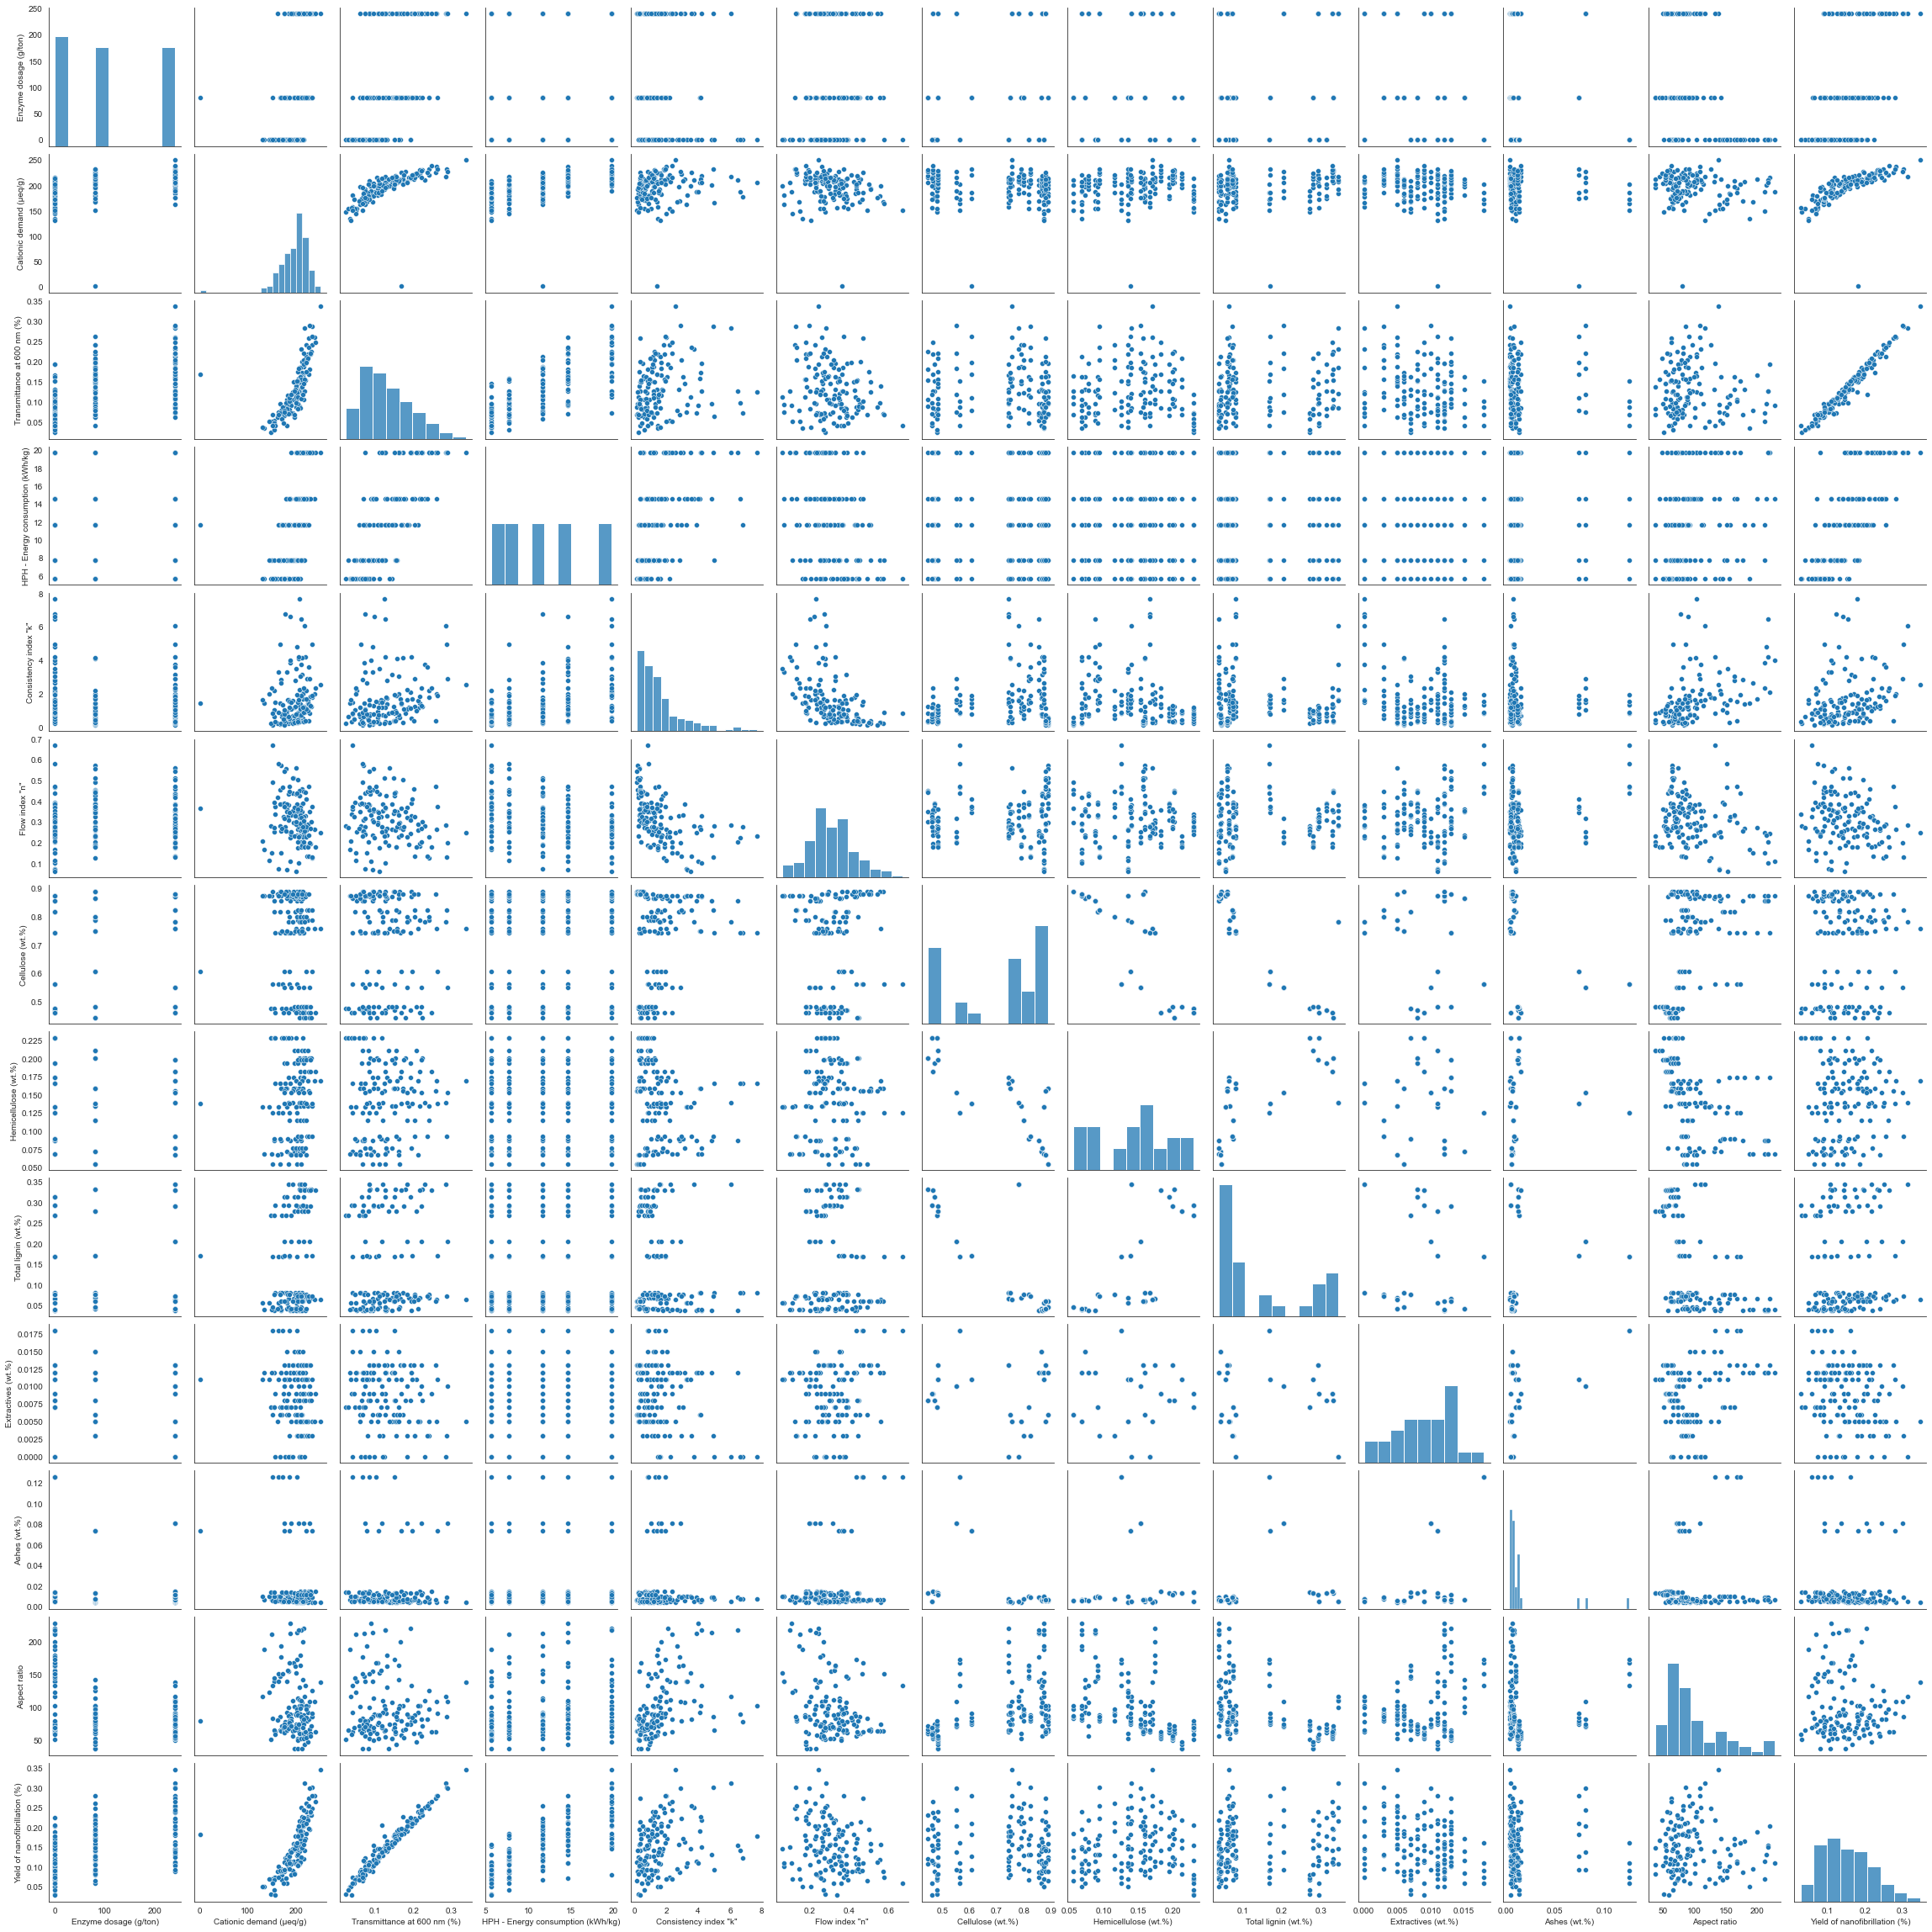

In [9]:
# Checking what types of values we have in the dataset
display(pd.DataFrame(df_4.info()))

# Getting basic statistic information from data
display(df_4.describe().T)


# looking at a pairplot of the whole dataset
sns.pairplot(df_4);

In [10]:
# Checking only correlation variables between variables and Aspect ratio
df_4.corr().abs()['Aspect ratio'].sort_values(ascending=False)

Aspect ratio                         1.000000
Hemicellulose (wt.%)                 0.508569
Total lignin (wt.%)                  0.462739
Consistency index "k"                0.447439
Cellulose (wt.%)                     0.440788
Enzyme dosage (g/ton)                0.405515
Extractives (wt.%)                   0.259191
Flow index "n"                       0.258723
HPH - Energy consumption (kWh/kg)    0.230663
Cationic demand (µeq/g)              0.115812
Ashes (wt.%)                         0.090162
Transmittance at 600 nm (%)          0.068000
Yield of nanofibrillation (%)        0.059417
Name: Aspect ratio, dtype: float64

In [11]:
# Checking only correlation variables between variables and Yield of nanofibrillation
df_4.corr().abs()['Yield of nanofibrillation (%)'].sort_values(ascending=False)

Yield of nanofibrillation (%)        1.000000
Transmittance at 600 nm (%)          0.981898
HPH - Energy consumption (kWh/kg)    0.726261
Cationic demand (µeq/g)              0.692499
Enzyme dosage (g/ton)                0.471275
Consistency index "k"                0.282223
Extractives (wt.%)                   0.242188
Flow index "n"                       0.226128
Aspect ratio                         0.059417
Total lignin (wt.%)                  0.046724
Ashes (wt.%)                         0.042045
Hemicellulose (wt.%)                 0.041159
Cellulose (wt.%)                     0.016527
Name: Yield of nanofibrillation (%), dtype: float64

In [14]:
#shuffling data

original_df_4 = shuffle(df_4, random_state=0)

# separating features and targets dataframes

# For the independent features:

X_v2 = original_df_4.iloc[:,0:-2].copy()

# For the targets:

y_AR_v2 = original_df_4.iloc[:,-2].copy()
#y_YI_v2 = original_df_4.iloc[:,-1].copy()

In [15]:
X_v2

,Enzyme dosage (g/ton),Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%)
Sample,,,,,,,,,,,
Hempmec(3),0,134,0.0350,5.67,1.4372,0.166,0.872,0.068,0.040,0.012,0.007
HempHenz240(3+3+3),240,221,0.2120,19.72,1.1170,0.262,0.878,0.067,0.043,0.005,0.006
EucaHenz80(3+3),80,216,0.1880,11.67,1.1993,0.193,0.788,0.135,0.068,0.005,0.004
HempHenz80(3),80,151,0.0690,5.67,0.1308,0.491,0.887,0.055,0.047,0.006,0.006
Aspenmec(3+3),0,196,0.1280,11.67,0.6667,0.369,0.471,0.194,0.313,0.008,0.013
...,...,...,...,...,...,...,...,...,...,...,...
EucaHenz80(3+3+3),80,232,0.2412,19.72,1.7978,0.125,0.788,0.135,0.068,0.005,0.004
AspenHenz240(3+3+1),240,230,0.2180,14.59,1.8546,0.195,0.464,0.182,0.330,0.009,0.015
SisalHenz80(3+3),80,194,0.1490,11.67,0.3665,0.511,0.887,0.159,0.061,0.012,0.007


In [12]:
y_AR_v2

Sample
Hempmec(3)             188
HempHenz240(3+3+3)     103
EucaHenz80(3+3)         86
HempHenz80(3)           83
Aspenmec(3+3)           65
                      ... 
EucaHenz80(3+3+3)      126
AspenHenz240(3+3+1)     60
SisalHenz80(3+3)        67
TMPHenz240(3+3)         53
Hempmec(3+3)           193
Name: Aspect ratio, Length: 140, dtype: int64

In [16]:
# train, validation and test splits for aspect ratio

X_train_AR_v2, X_test_AR_v2, y_train_AR_v2, y_test_AR_v2 = train_test_split(X_v2, y_AR_v2, train_size = 0.7, test_size = 0.3, random_state = 78)

X_test_AR_v2, X_val_AR_v2, y_test_AR_v2, y_val_AR_v2 = train_test_split(X_test_AR_v2, y_test_AR_v2, train_size = 0.5, test_size = 0.5, random_state = 78)

In [236]:
# saving the data
#X_v2.to_csv('new_features_v2.csv', index = False)
#y_AR_v2.to_csv('new_targets_AR_v2.csv', index = False)

#X_train_AR_v2.to_csv('new_train_features_AR_v2.csv', index = False)
#X_test_AR_v2.to_csv('new_test_features_AR_v2.csv', index = False)
#X_val_AR_v2.to_csv('new_val_features_AR_v2.csv', index = False)

#y_train_AR_v2.to_csv('new_train_targets_AR_v2.csv', index = False)
#y_test_AR_v2.to_csv('new_test_targets_AR_v2.csv', index = False)
#y_val_AR_v2.to_csv('new_val_targets_AR_v2.csv', index = False)

In [23]:
# i will try now to do a bay search with all features:

bay_n_estimators = Integer(1,150) # number of trees in the random forest
bay_max_features_3 = Integer(1,11) # number of features in consideration at every split
bay_max_depth = Integer(1,100) # maximum number of levels allowed in each decision tree
bay_min_samples_leaf =Integer(1,4) # leaving only 2,3,4, not one sample


bay_grid_3 = {'n_estimators': bay_n_estimators,

'max_features': bay_max_features_3,

'max_depth': bay_max_depth,

'min_samples_leaf': bay_min_samples_leaf}

In [24]:
opt_3 = BayesSearchCV(estimator = RandomForestRegressor(), search_spaces = bay_grid_3, n_iter = 50, cv = 5,
                     verbose=0, random_state=35, n_jobs = -1)
       

opt_3.fit(X_train_AR_v2, y_train_AR_v2)

C:\Users\Solange Iamin\Documents\Anaconda\envs\Python38_TF2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=11, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=150, prior='uniform', transform='normalize')})

In [25]:
print ('Bayesian grid: ', opt_3, '\n')
# print the best parameters
print ('Best Parameters: ', opt_3.best_params_, ' \n')

Bayesian grid:  BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=11, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=150, prior='uniform', transform='normalize')}) 

Best Parameters:  OrderedDict([('max_depth', 8), ('max_features', 8), ('min_samples_leaf', 1), ('n_estimators', 100)])  



In [26]:
opt_3.best_score_

0.8433132323931071

In [21]:
# using the best parameters

RF_bay_4 = RandomForestRegressor(n_estimators = 100,  min_samples_leaf= 1, max_features= 8, max_depth= 8, 
                                 random_state = 13) 
RF_bay_4.fit(X_train_AR_v2, y_train_AR_v2) 

RandomForestRegressor(max_depth=8, max_features=8, random_state=13)

MAE: 4.432060238797481
MAPE: 0.04696082226659291
RSME: 5.6307043297059245
R2: 0.9841966268303125


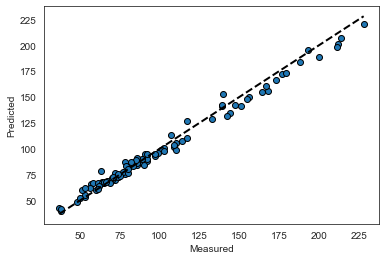

In [22]:
RF_bay_4_pred = RF_bay_4.predict(X_train_AR_v2)

print ('MAE:', mean_absolute_error(y_train_AR_v2,RF_bay_4_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train_AR_v2,RF_bay_4_pred))
print('RSME:' , mean_squared_error(y_train_AR_v2,RF_bay_4_pred, squared = False))
print('R2:' , r2_score(y_train_AR_v2,RF_bay_4_pred))

fig, ax = plt.subplots()
ax.scatter(y_train_AR_v2, RF_bay_4_pred, edgecolors=(0, 0, 0))
ax.plot([y_train_AR_v2.min(), y_train_AR_v2.max()], [y_train_AR_v2.min(), y_train_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_2_A_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

MAE: 8.429220006184291
MAPE: 0.09137701750739458
RSME: 11.478932353987503
R2: 0.9235213863016611


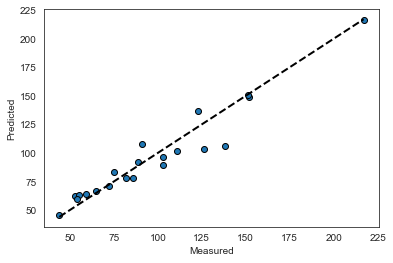

In [23]:
RF_bay_4_pred_val = RF_bay_4.predict(X_val_AR_v2)

print ('MAE:', mean_absolute_error(y_val_AR_v2,RF_bay_4_pred_val))
print('MAPE:' , mean_absolute_percentage_error(y_val_AR_v2,RF_bay_4_pred_val))
print('RSME:' , mean_squared_error(y_val_AR_v2,RF_bay_4_pred_val, squared = False))
print('R2:' , r2_score(y_val_AR_v2,RF_bay_4_pred_val))

fig, ax = plt.subplots()
ax.scatter(y_val_AR_v2,RF_bay_4_pred_val, edgecolors=(0, 0, 0))
ax.plot([y_val_AR_v2.min(), y_val_AR_v2.max()], [y_val_AR_v2.min(), y_val_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_2_B_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [30]:
#RF_compiled_results_3_case1 = 'RF_compiled_results_3_case1.pkl'
#pickle.dump(RF_bay_4, open(RF_compiled_results_3_case1, 'wb'))

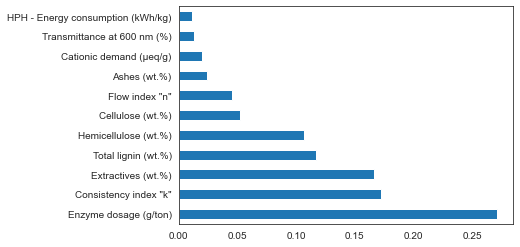

In [21]:
feat_importances_model_randmf_new_bay = pd.Series(RF_bay_4.feature_importances_, index=X_train_AR_v2.columns)
#plt.savefig('Figure_3_article_v2_version.png', dpi=600, bbox_inches = "tight")
feat_importances_model_randmf_new_bay.nlargest(11).plot(kind='barh');

In [22]:
feat_importances_model_randmf_new_bay

Enzyme dosage (g/ton)                0.271354
Cationic demand (µeq/g)              0.019609
Transmittance at 600 nm (%)          0.013152
HPH - Energy consumption (kWh/kg)    0.011193
Consistency index "k"                0.172458
Flow index "n"                       0.045468
Cellulose (wt.%)                     0.052671
Hemicellulose (wt.%)                 0.106476
Total lignin (wt.%)                  0.116987
Extractives (wt.%)                   0.166208
Ashes (wt.%)                         0.024424
dtype: float64

MAE: 7.98783719851577
MAPE: 0.08989023734479833
RSME: 11.329816355310323
R2: 0.9440430487397121


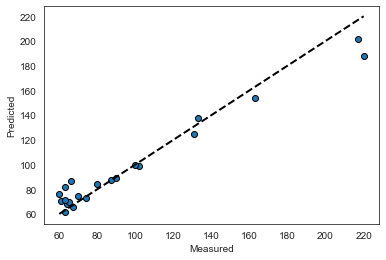

In [24]:
RF_bay_4_pred_test = RF_bay_4.predict(X_test_AR_v2)

print ('MAE:', mean_absolute_error(y_test_AR_v2,RF_bay_4_pred_test))
print('MAPE:' , mean_absolute_percentage_error(y_test_AR_v2,RF_bay_4_pred_test))
print('RSME:' , mean_squared_error(y_test_AR_v2,RF_bay_4_pred_test, squared = False))
print('R2:' , r2_score(y_test_AR_v2,RF_bay_4_pred_test))

fig, ax = plt.subplots()
ax.scatter(y_test_AR_v2,RF_bay_4_pred_test, edgecolors=(0, 0, 0))
ax.plot([y_test_AR_v2.min(), y_test_AR_v2.max()], [y_test_AR_v2.min(), y_test_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_2_C_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [19]:
#combining validation and test datasets

X_val_test_AR_v2 = pd.concat([X_test_AR_v2, X_val_AR_v2])
y_val_test_AR_v2 = pd.concat([y_test_AR_v2, y_val_AR_v2])

MAE: 8.208528602350032
MAPE: 0.09063362742609646
RSME: 11.404618069722423
R2: 0.9352428183368917


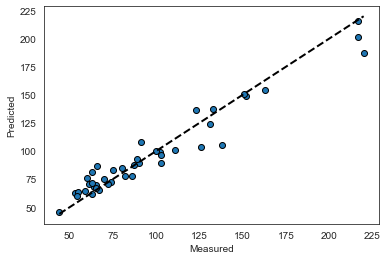

In [25]:
RF_bay_4_pred_val_test = RF_bay_4.predict(X_val_test_AR_v2)

print ('MAE:', mean_absolute_error(y_val_test_AR_v2,RF_bay_4_pred_val_test))
print('MAPE:' , mean_absolute_percentage_error(y_val_test_AR_v2,RF_bay_4_pred_val_test))
print('RSME:' , mean_squared_error(y_val_test_AR_v2,RF_bay_4_pred_val_test, squared = False))
print('R2:' , r2_score(y_val_test_AR_v2,RF_bay_4_pred_val_test))

fig, ax = plt.subplots()
ax.scatter(y_val_test_AR_v2,RF_bay_4_pred_val_test, edgecolors=(0, 0, 0))
ax.plot([y_val_test_AR_v2.min(), y_val_test_AR_v2.max()], [y_val_test_AR_v2.min(), y_val_test_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_2_C_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [27]:
#checking out if i get rid of rec80henz(3+3) changes the results much

X_test_AR_v2_norec = X_test_AR_v2.drop('RecHenz80(3+3)')
y_test_AR_v2_norec = y_test_AR_v2.drop(['RecHenz80(3+3)'])

MAE: 8.164187391774892
MAPE: 0.09159672837870492
RSME: 11.566677304910053
R2: 0.9441000423566067


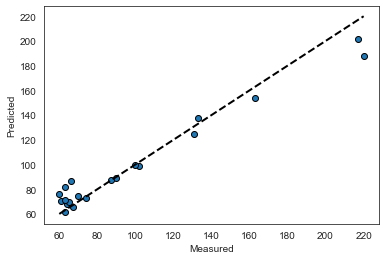

In [28]:
RF_bay_4_pred_test_tryingsth = RF_bay_4.predict(X_test_AR_v2_norec)

print ('MAE:', mean_absolute_error(y_test_AR_v2_norec,RF_bay_4_pred_test_tryingsth))
print('MAPE:' , mean_absolute_percentage_error(y_test_AR_v2_norec,RF_bay_4_pred_test_tryingsth))
print('RSME:' , mean_squared_error(y_test_AR_v2_norec,RF_bay_4_pred_test_tryingsth, squared = False))
print('R2:' , r2_score(y_test_AR_v2_norec,RF_bay_4_pred_test_tryingsth))

fig, ax = plt.subplots()
ax.scatter(y_test_AR_v2_norec,RF_bay_4_pred_test_tryingsth, edgecolors=(0, 0, 0))
ax.plot([y_test_AR_v2_norec.min(), y_test_AR_v2_norec.max()], [y_test_AR_v2_norec.min(), y_test_AR_v2_norec.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_2_C_article_v2_version_NOREC.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [24]:
#putting data in xls format:

train_info_11_feature_model_AR = pd.DataFrame(RF_bay_4_pred, index = y_train_AR_v2.index)

df_train_info_11_feature_model_AR  = pd.concat([y_train_AR_v2,train_info_11_feature_model_AR], axis = 1)
df_train_info_11_feature_model_AR .columns = ['real_AR_values','predicted_AR_train_values_Fig2']

val_info_11_feature_model_AR  = pd.DataFrame(RF_bay_4_pred_val, index = y_val_AR_v2.index)

df_val_info_11_feature_model_AR  = pd.concat([y_val_AR_v2,val_info_11_feature_model_AR], axis = 1)
df_val_info_11_feature_model_AR .columns = ['real_AR_values','predicted_AR_val_values_Fig2']

test_info_11_feature_model_AR  = pd.DataFrame(RF_bay_4_pred_test, index = y_test_AR_v2.index)

df_test_info_11_feature_model_AR  = pd.concat([y_test_AR_v2,test_info_11_feature_model_AR], axis = 1)
df_test_info_11_feature_model_AR .columns = ['real_AR_values','predicted_AR_test_values_Fig2']

with pd.ExcelWriter("aspect_ratio_data_2_updated.xlsx") as writer:
    df_train_info_11_feature_model_AR.to_excel(writer, sheet_name="train_data_Figure_2")
    df_val_info_11_feature_model_AR.to_excel(writer, sheet_name="val_data_Figure_2")
    df_test_info_11_feature_model_AR.to_excel(writer, sheet_name="test_data_Figure_2")
    feat_importances_model_randmf_new_bay.to_excel(writer, sheet_name="feature_importance_Figure_3")

In [42]:
test_info_11_feature_model_AR

,0
Sample,
TMPmec(3+3+1),72.382000
JuteHenz80(3+3),88.919629
BKSPHenz80(3+3+1),124.871772
SisalHenz80(3+1),66.605610
SisalHenz240(3+3+1),70.477048
Aspenmec(3+3),69.668131
Recmec(3),137.670556
AspenHenz240(3+3+1),77.161512
UKSPHenz80(3+3+3),98.365381


In [ ]:
# i will try now to do a bayesian search with the 5 features selected:

bay_n_estimators = Integer(1,150) # number of trees in the random forest
bay_max_features_2 = Integer(1,5) # number of features in consideration at every split
bay_max_depth = Integer(1,100) # maximum number of levels allowed in each decision tree
bay_min_samples_leaf =Integer(1,4) # CHANGED RANGE TO 1,4


bay_grid_2 = {'n_estimators': bay_n_estimators,

'max_features': bay_max_features_2,

'max_depth': bay_max_depth,

'min_samples_leaf': bay_min_samples_leaf}

In [26]:
X_train_AR_random_4 = X_train_AR_v2[['Enzyme dosage (g/ton)', 'Total lignin (wt.%)', 'Hemicellulose (wt.%)', 
                                  'Extractives (wt.%)', 'Consistency index "k"']]
X_val_AR_random_4 = X_val_AR_v2[['Enzyme dosage (g/ton)', 'Total lignin (wt.%)', 'Hemicellulose (wt.%)', 
                                  'Extractives (wt.%)', 'Consistency index "k"']]

In [27]:
X_test_AR_random_4 = X_test_AR_v2[['Enzyme dosage (g/ton)', 'Total lignin (wt.%)', 'Hemicellulose (wt.%)', 
                                  'Extractives (wt.%)', 'Consistency index "k"']]

In [32]:
X_test_AR_random_4_norec = X_test_AR_random_4.drop('RecHenz80(3+3)')

In [50]:
opt_4 = BayesSearchCV(estimator = RandomForestRegressor(), search_spaces = bay_grid_2, n_iter = 50, cv = 5,
                     verbose=0, random_state=35, n_jobs = -1)
       

opt_4.fit(X_train_AR_random_4, y_train_AR_v2)

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=150, prior='uniform', transform='normalize')})

In [51]:
print ('Bayesian grid: ', opt_4, '\n')
# print the best parameters
print ('Best Parameters: ', opt_4.best_params_, ' \n')

Bayesian grid:  BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=150, prior='uniform', transform='normalize')}) 

Best Parameters:  OrderedDict([('max_depth', 100), ('max_features', 4), ('min_samples_leaf', 1), ('n_estimators', 83)])  



In [52]:
opt_4.best_score_

0.8536416375484658

In [66]:
#This last architecture does not correspond to opt4 search because I had overwritten the code with some different parameters
#Nevertheless, the architecture chosen is the one taht corresponds to the RF_bay_5 model

In [28]:
# using the best parameters

RF_bay_5 = RandomForestRegressor(n_estimators = 51,  min_samples_leaf= 1, max_features= 5, max_depth= 38, 
                                 random_state = 13) 
RF_bay_5.fit(X_train_AR_random_4, y_train_AR_v2) 

RandomForestRegressor(max_depth=38, max_features=5, n_estimators=51,
                      random_state=13)

MAE: 3.8657462985194075
MAPE: 0.04116492468349747
RSME: 5.244856628686908
R2: 0.9862882908860903


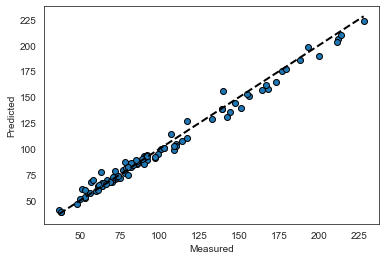

In [29]:
RF_bay_5_pred = RF_bay_5.predict(X_train_AR_random_4)

print ('MAE:', mean_absolute_error(y_train_AR_v2,RF_bay_5_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train_AR_v2,RF_bay_5_pred))
print('RSME:' , mean_squared_error(y_train_AR_v2,RF_bay_5_pred, squared = False))
print('R2:' , r2_score(y_train_AR_v2,RF_bay_5_pred))

fig, ax = plt.subplots()
ax.scatter(y_train_AR_v2,RF_bay_5_pred, edgecolors=(0, 0, 0))
ax.plot([y_train_AR_v2.min(), y_train_AR_v2.max()], [y_train_AR_v2.min(), y_train_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_4_A_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

MAE: 9.937441643323995
MAPE: 0.10440412052805634
RSME: 13.0201864753918
R2: 0.901605364236562


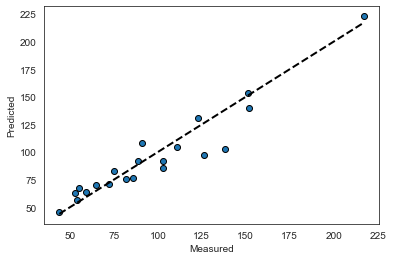

In [30]:
RF_bay_5_pred_val = RF_bay_5.predict(X_val_AR_random_4)

print ('MAE:', mean_absolute_error(y_val_AR_v2,RF_bay_5_pred_val))
print('MAPE:' , mean_absolute_percentage_error(y_val_AR_v2,RF_bay_5_pred_val))
print('RSME:' , mean_squared_error(y_val_AR_v2,RF_bay_5_pred_val, squared = False))
print('R2:' , r2_score(y_val_AR_v2,RF_bay_5_pred_val))

fig, ax = plt.subplots()
ax.scatter(y_val_AR_v2,RF_bay_5_pred_val, edgecolors=(0, 0, 0))
ax.plot([y_val_AR_v2.min(), y_val_AR_v2.max()], [y_val_AR_v2.min(), y_val_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_4_B_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [65]:
#RF_compiled_results_3_case2 = 'RF_compiled_results_3_case2.pkl'
#pickle.dump(RF_bay_5, open(RF_compiled_results_3_case2, 'wb'))

MAE: 8.159663865546218
MAPE: 0.09432019058598178
RSME: 12.456203643522864
R2: 0.9323637215824343


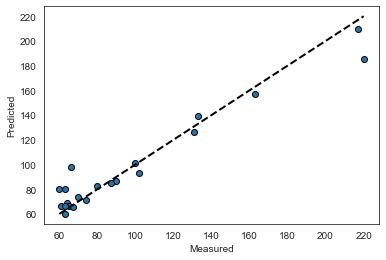

In [33]:
RF_bay_5_pred_test  = RF_bay_5.predict(X_test_AR_random_4)

print ('MAE:', mean_absolute_error(y_test_AR_v2,RF_bay_5_pred_test ))
print('MAPE:' , mean_absolute_percentage_error(y_test_AR_v2,RF_bay_5_pred_test))
print('RSME:' , mean_squared_error(y_test_AR_v2,RF_bay_5_pred_test , squared = False))
print('R2:' , r2_score(y_test_AR_v2,RF_bay_5_pred_test ))

fig, ax = plt.subplots()
ax.scatter(y_test_AR_v2,RF_bay_5_pred_test , edgecolors=(0, 0, 0))
ax.plot([y_test_AR_v2.min(), y_test_AR_v2.max()], [y_test_AR_v2.min(), y_test_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_4_C_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [33]:
#combining validation and test datasets

X_val_test_AR_random_4 = pd.concat([X_test_AR_random_4, X_val_AR_random_4])
y_val_test_AR_v2 = pd.concat([y_test_AR_v2, y_val_AR_v2])

MAE: 9.048552754435107
MAPE: 0.09936215555701904
RSME: 12.741315965450505
R2: 0.9191732680859126


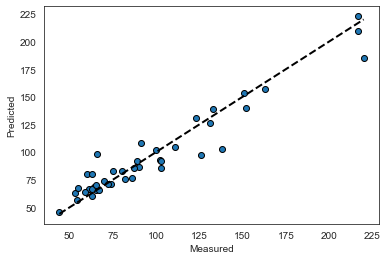

In [34]:
RF_bay_5_pred_val_test  = RF_bay_5.predict(X_val_test_AR_random_4)

print ('MAE:', mean_absolute_error(y_val_test_AR_v2,RF_bay_5_pred_val_test ))
print('MAPE:' , mean_absolute_percentage_error(y_val_test_AR_v2,RF_bay_5_pred_val_test))
print('RSME:' , mean_squared_error(y_val_test_AR_v2,RF_bay_5_pred_val_test , squared = False))
print('R2:' , r2_score(y_val_test_AR_v2,RF_bay_5_pred_val_test ))

fig, ax = plt.subplots()
ax.scatter(y_val_test_AR_v2,RF_bay_5_pred_val_test , edgecolors=(0, 0, 0))
ax.plot([y_val_test_AR_v2.min(), y_val_test_AR_v2.max()], [y_val_test_AR_v2.min(), y_val_test_AR_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_4_C_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [34]:
#getting data for Roberto in xls format:

train_info_5_feature_model_AR = pd.DataFrame(RF_bay_5_pred, index = y_train_AR_v2.index)

df_train_info_5_feature_model_AR  = pd.concat([y_train_AR_v2,train_info_5_feature_model_AR], axis = 1)
df_train_info_5_feature_model_AR .columns = ['real_AR_values','predicted_AR_train_values_Fig4']

val_info_5_feature_model_AR  = pd.DataFrame(RF_bay_5_pred_val, index = y_val_AR_v2.index)

df_val_info_5_feature_model_AR  = pd.concat([y_val_AR_v2,val_info_5_feature_model_AR], axis = 1)
df_val_info_5_feature_model_AR .columns = ['real_AR_values','predicted_AR_val_values_Fig4']

test_info_5_feature_model_AR  = pd.DataFrame(RF_bay_5_pred_test, index = y_test_AR_v2.index)

df_test_info_5_feature_model_AR  = pd.concat([y_test_AR_v2,test_info_5_feature_model_AR], axis = 1)
df_test_info_5_feature_model_AR .columns = ['real_AR_values','predicted_AR_test_values_Fig4']

with pd.ExcelWriter("aspect_ratio_data_2_updated.xlsx") as writer:
    df_train_info_11_feature_model_AR.to_excel(writer, sheet_name="train_data_Figure_2")
    df_val_info_11_feature_model_AR.to_excel(writer, sheet_name="val_data_Figure_2")
    df_test_info_11_feature_model_AR.to_excel(writer, sheet_name="test_data_Figure_2")
    feat_importances_model_randmf_new_bay.to_excel(writer, sheet_name="feature_importance_Figure_3")
    df_train_info_5_feature_model_AR.to_excel(writer, sheet_name="train_data_Figure_4")
    df_val_info_5_feature_model_AR.to_excel(writer, sheet_name="val_data_Figure_4")
    df_test_info_5_feature_model_AR.to_excel(writer, sheet_name="test_data_Figure_4")